In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. 데이터 확인

In [363]:
delivery_df = pd.read_csv('/jupyter/Data/Delivery/delivery_raw.csv', sep='\t')
delivery_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [364]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [365]:
delivery_df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift                                   16262
total_busy                                      16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [366]:
delivery_df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


## 2. EDA & FE

### actual_delivery_time

In [367]:
time_nan = delivery_df[delivery_df['actual_delivery_time'].isnull()].index
delivery_df.drop(time_nan, axis=0, inplace=True)
delivery_df['actual_delivery_time'].isnull().sum()

0

actual_delivery_time이 NULL값을 가지게 되면 target label이 없는것이나 다름이 없으므로 해당 데이터를 drop

In [368]:
# datetime 형식으로 변경
delivery_df['actual_delivery_time'] = pd.to_datetime(delivery_df['actual_delivery_time'])

### created_at

In [369]:
# datetime 형식으로 변경
delivery_df['created_at'] = pd.to_datetime(delivery_df['created_at'])

### delivery_time(target label)

In [370]:
delivery_df['delivery_time'] = delivery_df['actual_delivery_time'] - delivery_df['created_at']
delivery_df['delivery_time']

0        0 days 01:02:59
1        0 days 01:07:04
2        0 days 00:29:41
3        0 days 00:51:15
4        0 days 00:39:50
               ...      
197423   0 days 01:05:07
197424   0 days 00:56:23
197425   0 days 00:50:08
197426   0 days 01:05:07
197427   0 days 00:37:08
Name: delivery_time, Length: 197421, dtype: timedelta64[ns]

In [371]:
delivery_df['delivery_time'].dt.days.value_counts()

0     197418
98         1
3          1
4          1
Name: delivery_time, dtype: int64

In [372]:
# 이상치라고 판단되는 데이터를 제거

outlier_idx = delivery_df[
    (delivery_df['delivery_time'].dt.days==98) | 
    (delivery_df['delivery_time'].dt.days==3)  |
    (delivery_df['delivery_time'].dt.days==4)
].index
outlier_idx

Int64Index([2690, 27189, 185550], dtype='int64')

In [373]:
delivery_df.drop(outlier_idx, axis=0, inplace=True)
delivery_df['delivery_time'].dt.days.value_counts()

0    197418
Name: delivery_time, dtype: int64

In [374]:
# target label을 초단위로 변경
def time_to_second(delivery_time):
    delivery_time = str(delivery_time)
    time = delivery_time.split(':')
    time[0] = time[0].split()[-1]
    result = int(time[0])*3600 + int(time[1])*60 + int(time[2])
    return result

delivery_df['delivery_time'] = delivery_df['delivery_time'].apply(time_to_second)
delivery_df['delivery_time']

0         3779
1         4024
2         1781
3         3075
4         2390
          ... 
197423    3907
197424    3383
197425    3008
197426    3907
197427    2228
Name: delivery_time, Length: 197418, dtype: int64

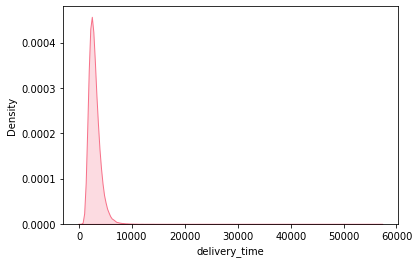

In [375]:
# target label 값 분포 확인
sns.set_palette("husl", 6)
sns.kdeplot(x='delivery_time', data=delivery_df, fill=True)
plt.show()

그래프가 왼쪽으로 조금 치우쳐 있으므로 로그 변환을 수행

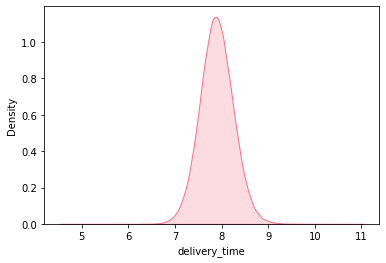

In [376]:
a = np.log(delivery_df['delivery_time'])
sns.kdeplot(a, fill=True)
plt.show()

### market_id

In [377]:
delivery_df['market_id'].isnull().sum()

987

987개의 NaN값을 확인할 수 있다.

**`store_id`로 `market_id`를 유추하는것이 가능하다.**

In [378]:
from collections import defaultdict
store_dic = defaultdict(set)

# store_id를 market_id 별로 딕셔너리에 분류
def cat_store_id(market, store):
    if np.isnan(market):
         return market
    store_dic[market].add(store)
    return market

In [379]:
delivery_df['market_id'] =  delivery_df.apply(lambda x: cat_store_id(x['market_id'], x['store_id']), axis=1)

In [381]:
market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for market in market_col:
    print(len(store_dic[market]))

2925
1939
2564
1818
1408
1310


In [382]:
delivery_df['store_id'].value_counts()

6865    937
1311    863
314     814
1686    765
3937    721
       ... 
1258      1
974       1
4260      1
6426      1
1845      1
Name: store_id, Length: 6743, dtype: int64

In [383]:
store_dic[1.0] -= (store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[2.0] -= (store_dic[1.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[3.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[4.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[5.0] | store_dic[6.0])
store_dic[5.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[6.0])
store_dic[6.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0])

In [384]:
market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for market in market_col:
    print(len(store_dic[market]))

1243
415
1644
1003
1125
1310


In [385]:
def fillna(market, store):
    if np.isnan(market):
        market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
        for i in market_col:
            if store in store_dic[i]:
                return i
        return market
    return market

In [386]:
delivery_df['market_id'] = delivery_df.apply(lambda x: fillna(x['market_id'], x['store_id']), axis=1)

In [387]:
delivery_df['market_id'].isnull().sum()

3

987개의 NaN값을 3개를 제외하고 전부 채워주었다.

In [389]:
delivery_df[delivery_df['market_id'].isnull()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
120923,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,2745
152850,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,3001
186154,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,1917


In [392]:
delivery_df[(delivery_df['store_id']==3258) | (delivery_df['store_id']==4122) | (delivery_df['store_id']==5774)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
120923,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,2745
152850,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,3001
186154,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,1917


In [396]:
market_id_nan = delivery_df[delivery_df['market_id'].isnull()].index
delivery_df.drop(market_id_nan, axis=0, inplace=True)

In [397]:
delivery_df['market_id'].isnull().sum()

0

### store_primary_category

In [399]:
delivery_df['store_primary_category'].isnull().sum()

4759

In [405]:
store_category_dic = defaultdict(list)

def cat_store(store_id, store_primary_category):
    if not store_primary_category:
        return store_primary_category
    else:
        store_category_dic[store_id].append(store_primary_category)
        return store_primary_category

In [406]:
delivery_df['store_primary_category'] = delivery_df.apply(lambda x: cat_store(x['store_id'], x['store_primary_category']), axis=1)

In [407]:
store_category_dic

defaultdict(list,
            {1845: ['american'],
             5477: ['mexican',
              nan,
              nan,
              nan,
              nan,
              nan,
              nan,
              'indian',
              nan,
              nan,
              nan,
              nan,
              nan],
             2841: ['italian', 'italian', 'italian', 'italian', 'italian'],
             4139: ['mexican', 'mexican'],
             5058: ['italian',
              'italian',
              'italian',
              'italian',
              'italian',
              'italian',
              'italian',
              'italian',
              'italian',
              'italian'],
             4149: ['sandwich',
              nan,
              nan,
              nan,
              'thai',
              nan,
              nan,
              nan,
              nan,
              nan],
             3201: ['cafe'],
             5054: ['italian', 'italian', 'italian', 'italian'],
       